### No contrast/duration comparisons, original jump off point

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import scipy

In [2]:
serverPath = Path(r'Z:\Subjects\AL_0023\2023-05-15\1')

timeFile = serverPath / 'cameraFrameTimes.npy'
frameTimes = np.squeeze(np.load(timeFile))[::2] # every other frame - we want blue only
svdTemp = np.load(serverPath / 'corr/50_svdTemporalComponents_corr.npy')
svdSpat = np.load(serverPath / 'blue/50_svdSpatialComponents.npy')
meanImage = np.load(serverPath / 'blue/meanImage.npy')
stimOnTimes = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestOnTimes.npy'))
stimContrasts = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestContrasts.npy'))
stimDurations = np.squeeze(np.load(r'Z:\Subjects\AL_0023\2023-05-15\3\linTestDurations.npy'))

getTempComp = scipy.interpolate.interp1d(frameTimes, svdTemp, axis=0)

In [3]:
# defined start and end times for trial: 0.1 s before to 0.4 after
startTime = stimOnTimes[0] - 0.1
endTime = stimOnTimes[0] + 0.4

trial_time = np.linspace(startTime, endTime, 100)

trial_activity = getTempComp(trial_time)

# collapse our spatial components from (px, py, n_comps) to (px*py, n_comps)
spatial = svdSpat.reshape(560*560, -1)

# multiply out: @ is shorthand for matrix multiplication (can also use np.dot or np.matmul)
video = spatial @ trial_activity.T

# go back to (px, py) instead of (px*py)
video = video.reshape(560, 560, -1)

In [4]:
video.shape

(560, 560, 100)

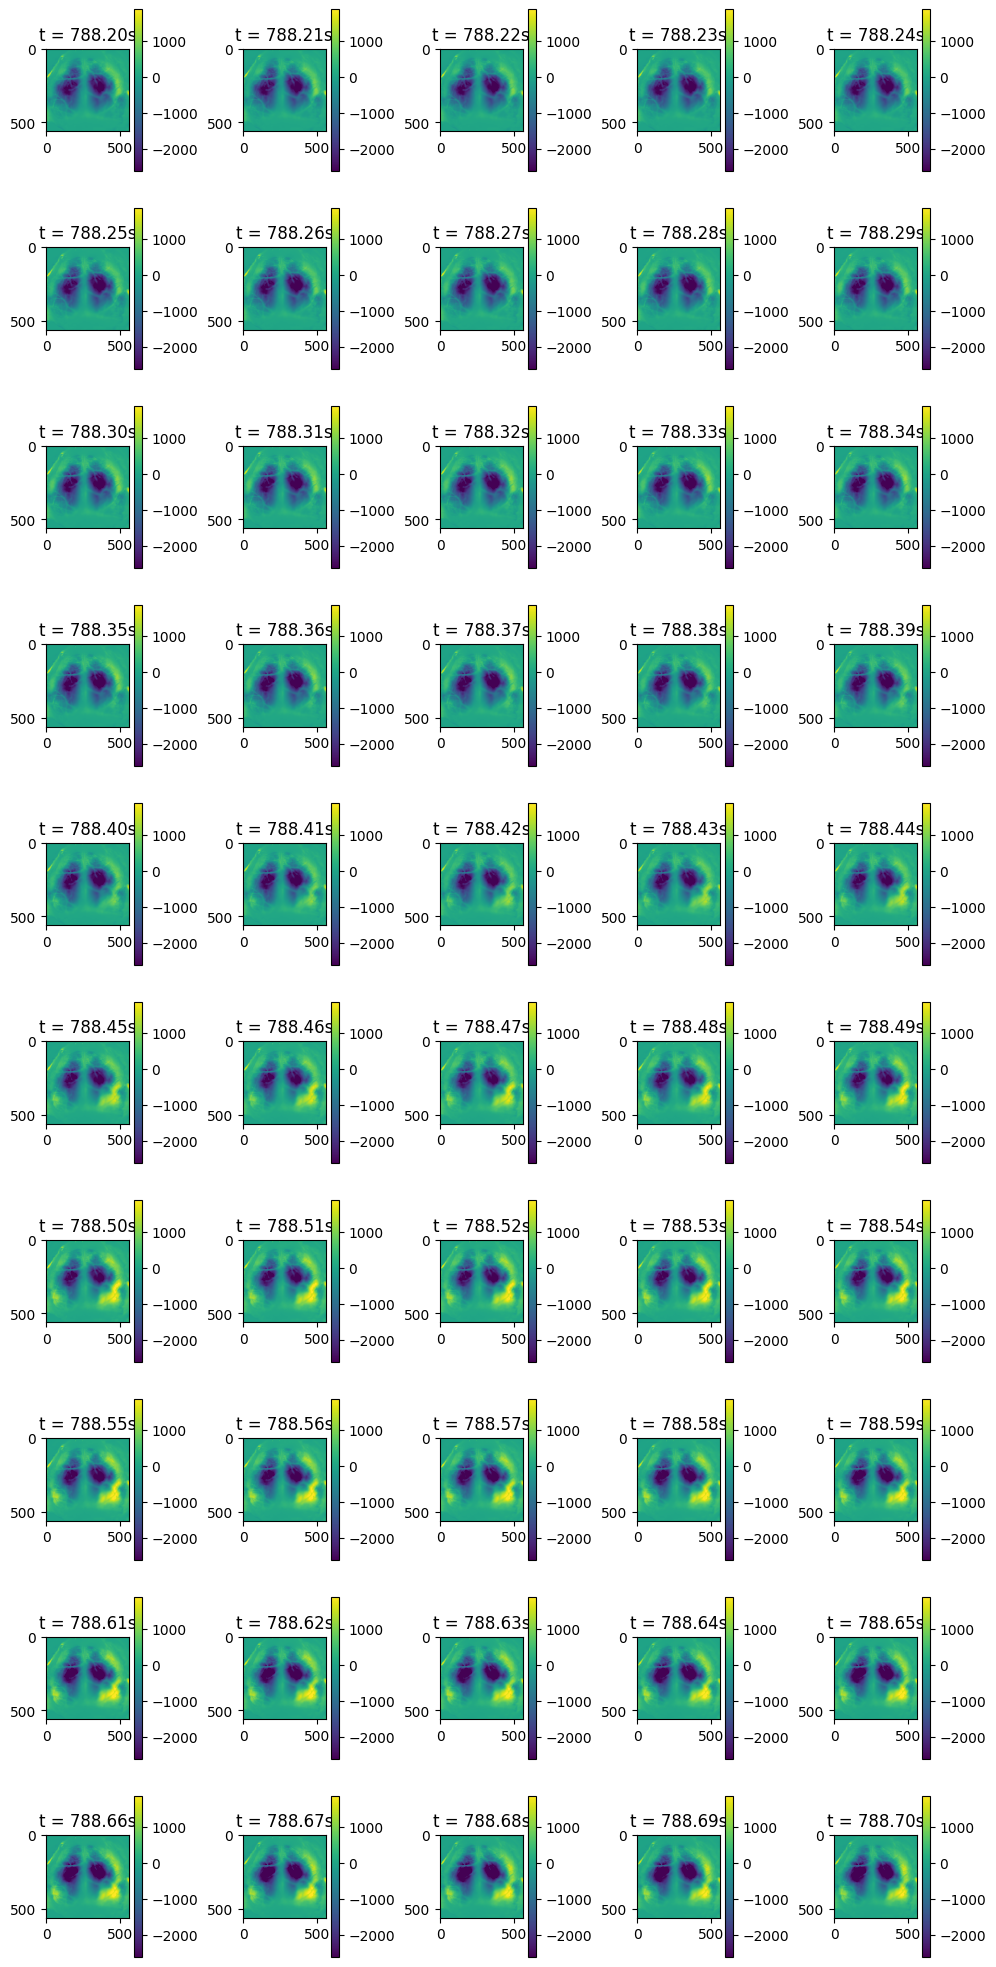

In [5]:
#video, basic
n_cols = 5
n_rows = 10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    plt.imshow(video[:, :, i*2], clim = np.percentile(video, (2, 99.9)))
    plt.title(f't = {trial_time[i*2]:.2f}s')
    plt.colorbar()
    
f.tight_layout()

In [6]:
#make a trial_time for all stimOnTimes
trial_time_all = [np.linspace(i-0.1, i+0.4, 100) for i in stimOnTimes]
trial_time_all = np.array(trial_time_all)

trial_activity_all = getTempComp(trial_time_all)

trial_activity_all_reshape = np.mean(trial_activity_all, axis=0)
spatial = svdSpat.reshape(560*560, -1)
videoAll = spatial @ trial_activity_all_reshape.T
videoAll = videoAll.reshape(560, 560, -1)

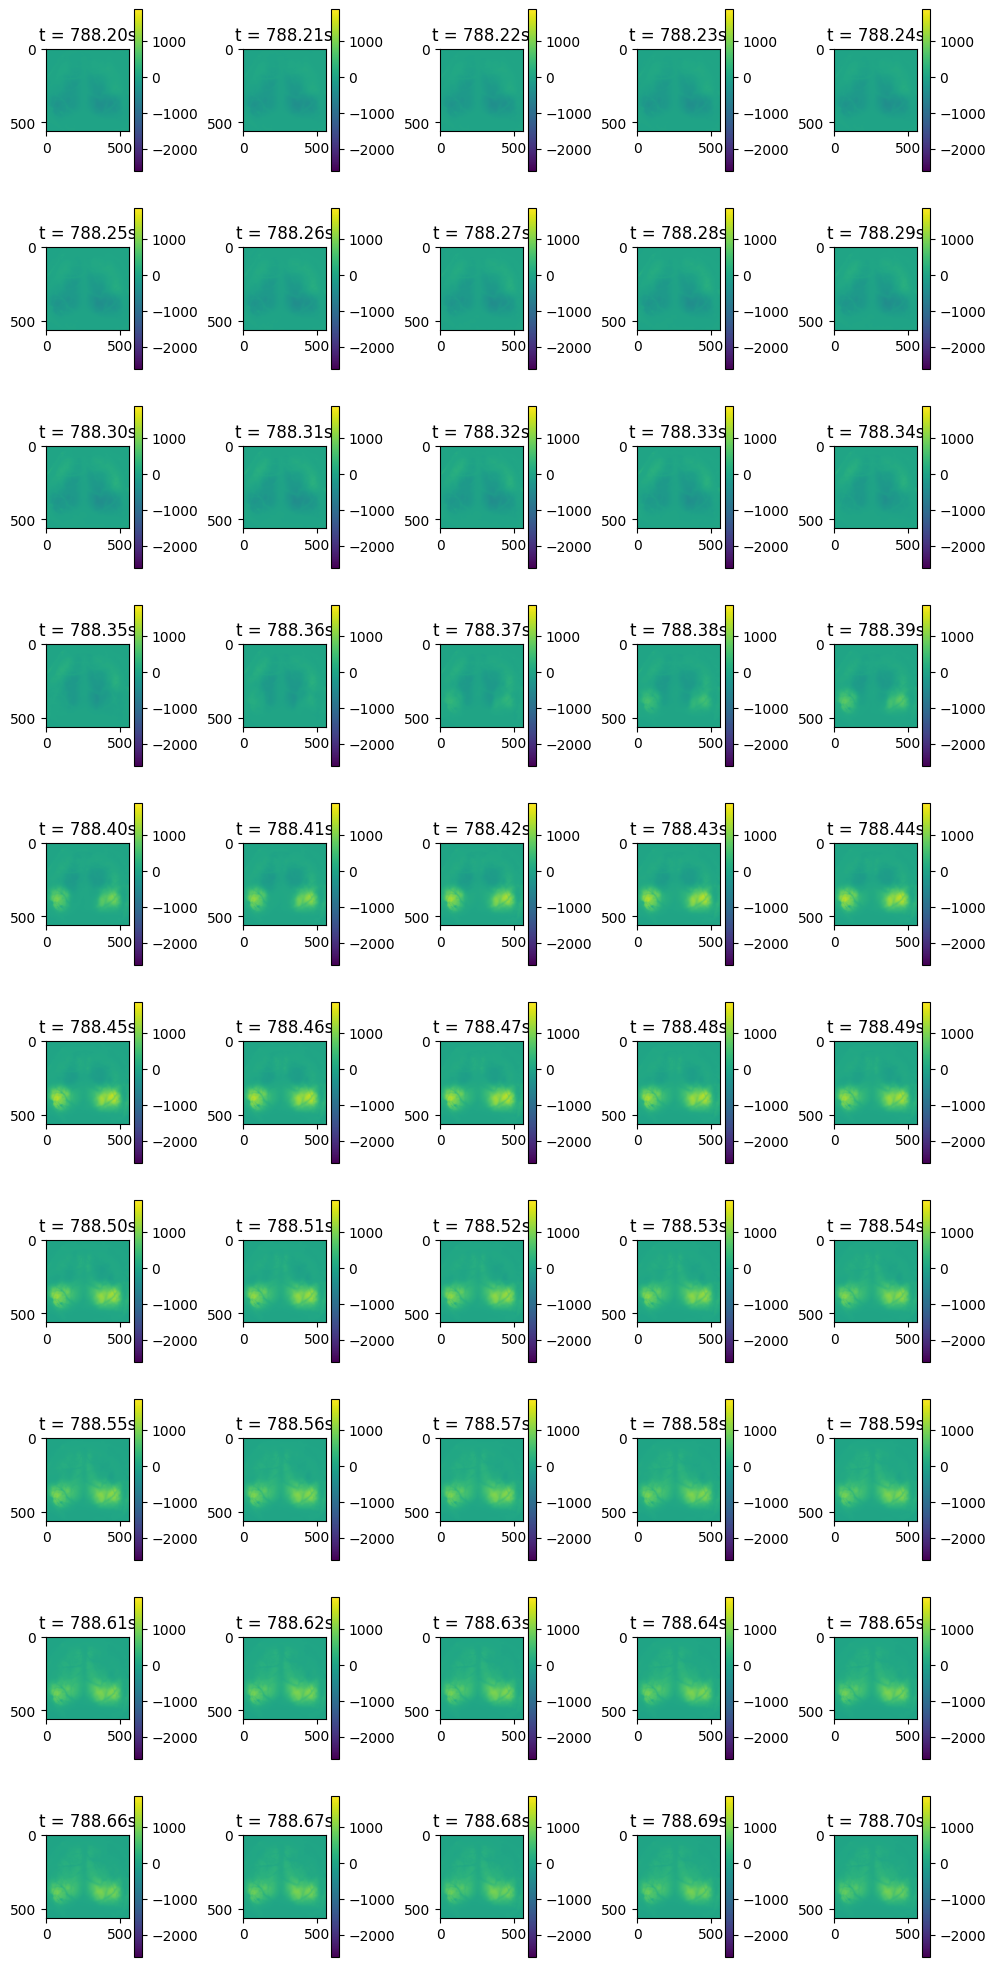

In [7]:
#video, all
n_cols = 5
n_rows = 10
f = plt.figure(figsize=(n_cols*2, n_rows*2))
gs = mpl.gridspec.GridSpec(n_rows, n_cols)
for i in range(50):
    ax = plt.subplot(gs[i])
    plt.imshow(videoAll[:, :, i*2], clim = np.percentile(video, (2, 99.9)))
    plt.title(f't = {trial_time[i*2]:.2f}s')
    plt.colorbar()
    
f.tight_layout()

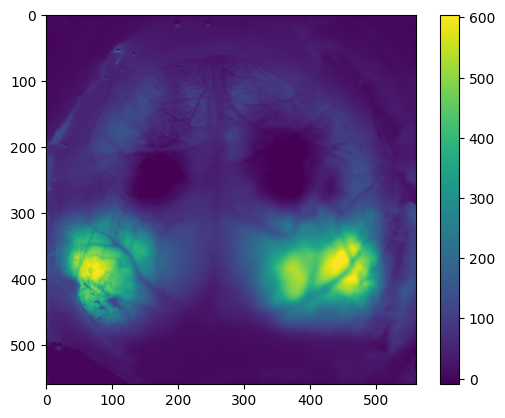

In [8]:
# average cortical response

# avg_trial_activity = np.mean(trial_activity_all, axis=1)
avg_trial_activity_re = np.mean(trial_activity_all, axis = 0)
spatial = svdSpat.reshape(560*560, -1)
videoAvg = spatial @ avg_trial_activity_re.T
videoAvg = videoAvg.reshape(560,560,-1)
videoAvg = np.mean(videoAvg, axis=2)

plt.imshow(videoAvg[:,:], clim = np.percentile(videoAvg, (2, 99.9)))
plt.colorbar()